###Importing necessary libraries

In [5]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import numpy as np
import math
import sys
import time
import csv

### Functions

### Function to make a 1D histogram plot
* min and max are determined by x's range, 
* mu and sigma are input estimates of mean and stdev 
* histogram uses nbin bins 
* xlabel is x-axis label (string)
* show = 0 produces figure, show=1 suspends execution to view


In [6]:
def makeHistogram1D(x, mu, sigma, nbin, show, xlabel, addline): 

# create the histogram of the data
    n, bins, patches = plt.hist(x, nbin, normed=1, facecolor='blue', alpha=0.3)
# add a 'best fit' line
#     y = mlab.normpdf(bins, mu, sigma)
#     plt.plot(bins, y, 'g--')
    if (addline): 
        xx = np.linspace(mu-4*sigma, mu+4*sigma, 200)
        yy = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5 * ((xx - mu)/sigma)**2)
        plt.plot(xx, yy, 'r-')
    plt.xlabel(xlabel)
    plt.ylabel('Probability')
    plt.title('Histogram')
    # Tweak spacing to prevent clipping of ylabel
#     plt.subplots_adjust(left=0.15)
    if (show): 
        plt.show()
    else:
        plt.figure()



### Function to read in {x,y} pair values from a csv file 
* reads in a sample of known size Nsam and return data the (x,y) values as two arrays

In [7]:
def readCSV(filename, Nsam):  

    x = np.zeros(Nsam, float)
    y = np.zeros(Nsam, float)

    print("opening file ", filename)
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        n = 0
        for row in reader:
            x[n] = float(row[0])
            y[n] = float(row[1])
            n += 1
    print("sample read has size ", n)  # note: no check that n=Nsam here
    return x,y


###MAIN BOOTSTRAP CODE 

opening file  03tuesday.csv
sample read has size  1000000
sample mean and stdev of x 15.0007238013 0.499878577352
Doing 1000 boostrap resamplings on sample of size  1000000


/Users/Demarkus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: This function is deprecated. Please call randint(0, 999999 + 1) instead
/Users/Demarkus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: This function is deprecated. Please call randint(0, 999999 + 1) instead


iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
5, 50, 95 percent xmean =  14.9999231524 15.0007162628 15.0015185562
5, 50, 95 percent xstdev =  0.499280936303 0.499896162785 0.500498013029
5, 50, 95 percent ymean =  -51.3739178371 -50.1103853613 -48.761306889
5, 50, 95 percent ystdev =  799.524496477 800.408513073 801.354039447
5, 50, 95 percent r =  -1.13045838389 0.0626520604079 2.31689935648
total time elapsed=  458.340823


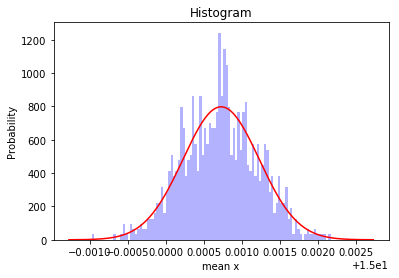

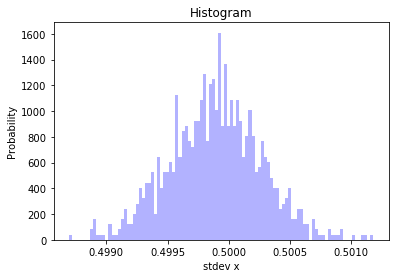

In [8]:
if __name__ == "__main__":
    tstart = time.clock()

# read in an existing file of known size
    Nread = 1000000
    x,y = readCSV("03tuesday.csv", Nread)

# downsample input data if desired  
    Nsam = 1000000
    if (Nsam < Nread):
        x = x[0:Nsam]
        print("x downsampled to length ", len(x))

# record mean and stdev of sample
    xmeanSam = sum(x)/Nsam
    xstdevSam = np.sqrt(sum((x-xmeanSam)**2)/(Nsam-1))
    print ("sample mean and stdev of x", xmeanSam, xstdevSam)

# M is the number of bootstrap samples to generate
    M = 1000
    print("Doing", M, "boostrap resamplings on sample of size ", Nsam)

# create arrays to hold iteration values of mean and stdev
    xmean = np.zeros(M,float)
    xstdev = np.zeros(M,float)
    ymean = np.zeros(M,float)
    ystdev = np.zeros(M,float)
    r = np.zeros(M,float)
    
# start bootstrap
    i=0
    while(i<M):
        itmp = np.random.random_integers(0, Nsam-1, Nsam)
        jtmp = np.random.random_integers(0, Nsam-1, Nsam)
        xtmp = x[itmp]
        ytmp = y[jtmp]

# record mean and stdev for this sample
        xmean[i] = sum(xtmp)/Nsam
        xstdev[i] = np.sqrt(sum((xtmp-xmean[i])**2)/(Nsam-1))
        ymean[i] = sum(ytmp)/Nsam
        ystdev[i] = np.sqrt(sum((ytmp-ymean[i])**2)/(Nsam-1))
        r[i] = ((x[i]-xmean[i])/xstdev[i])*((y[i]-ymean[i])/ystdev[i])

        if(i%100==0): print("iteration", i)
        i += 1
# compute median and 5, 95%-ile values 
    xmeansort = np.sort(xmean)
    print("5, 50, 95 percent xmean = ", xmeansort[int(0.05*M)], xmeansort[int(0.5*M)], xmeansort[int(0.95*M)])
    xstdevsort = np.sort(xstdev)
    print("5, 50, 95 percent xstdev = ", xstdevsort[int(0.05*M)], xstdevsort[int(0.5*M)], xstdevsort[int(0.95*M)])
    
    ymeansort = np.sort(ymean)
    print("5, 50, 95 percent ymean = ", ymeansort[int(0.05*M)], ymeansort[int(0.5*M)], ymeansort[int(0.95*M)])
    ystdevsort = np.sort(ystdev)
    print("5, 50, 95 percent ystdev = ", ystdevsort[int(0.05*M)], ystdevsort[int(0.5*M)], ystdevsort[int(0.95*M)])

    rsort = np.sort(r)
    print("5, 50, 95 percent r = ", rsort[int(0.05*M)], rsort[int(0.5*M)], rsort[int(0.95*M)])

    
    tend = time.clock()
    print("total time elapsed= ", tend-tstart)

# plot frequency distributions from full set of bootstrap resamplings
    makeHistogram1D(xmean, xmeanSam, xstdevSam/np.sqrt(Nsam), 100, 0, 'mean x', 1)
#     fac = np.sqrt(Nsam*M)
    makeHistogram1D(xstdev, xstdevSam, xstdevSam/M, 100, 1, 'stdev x', 0)